# Bankruptcy Prevention

## Exploratory Data Analysis

### Notebook Walkthrough
    - Univariate Analysis

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
print('Imported')

Imported


In [2]:
df=pd.read_csv('Datasets/pre_processed_data.csv')
df.head()

,Unnamed: 0,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
1,2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
2,3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
3,4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
4,5,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy


In [3]:
## removing unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
1,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
2,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
3,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy


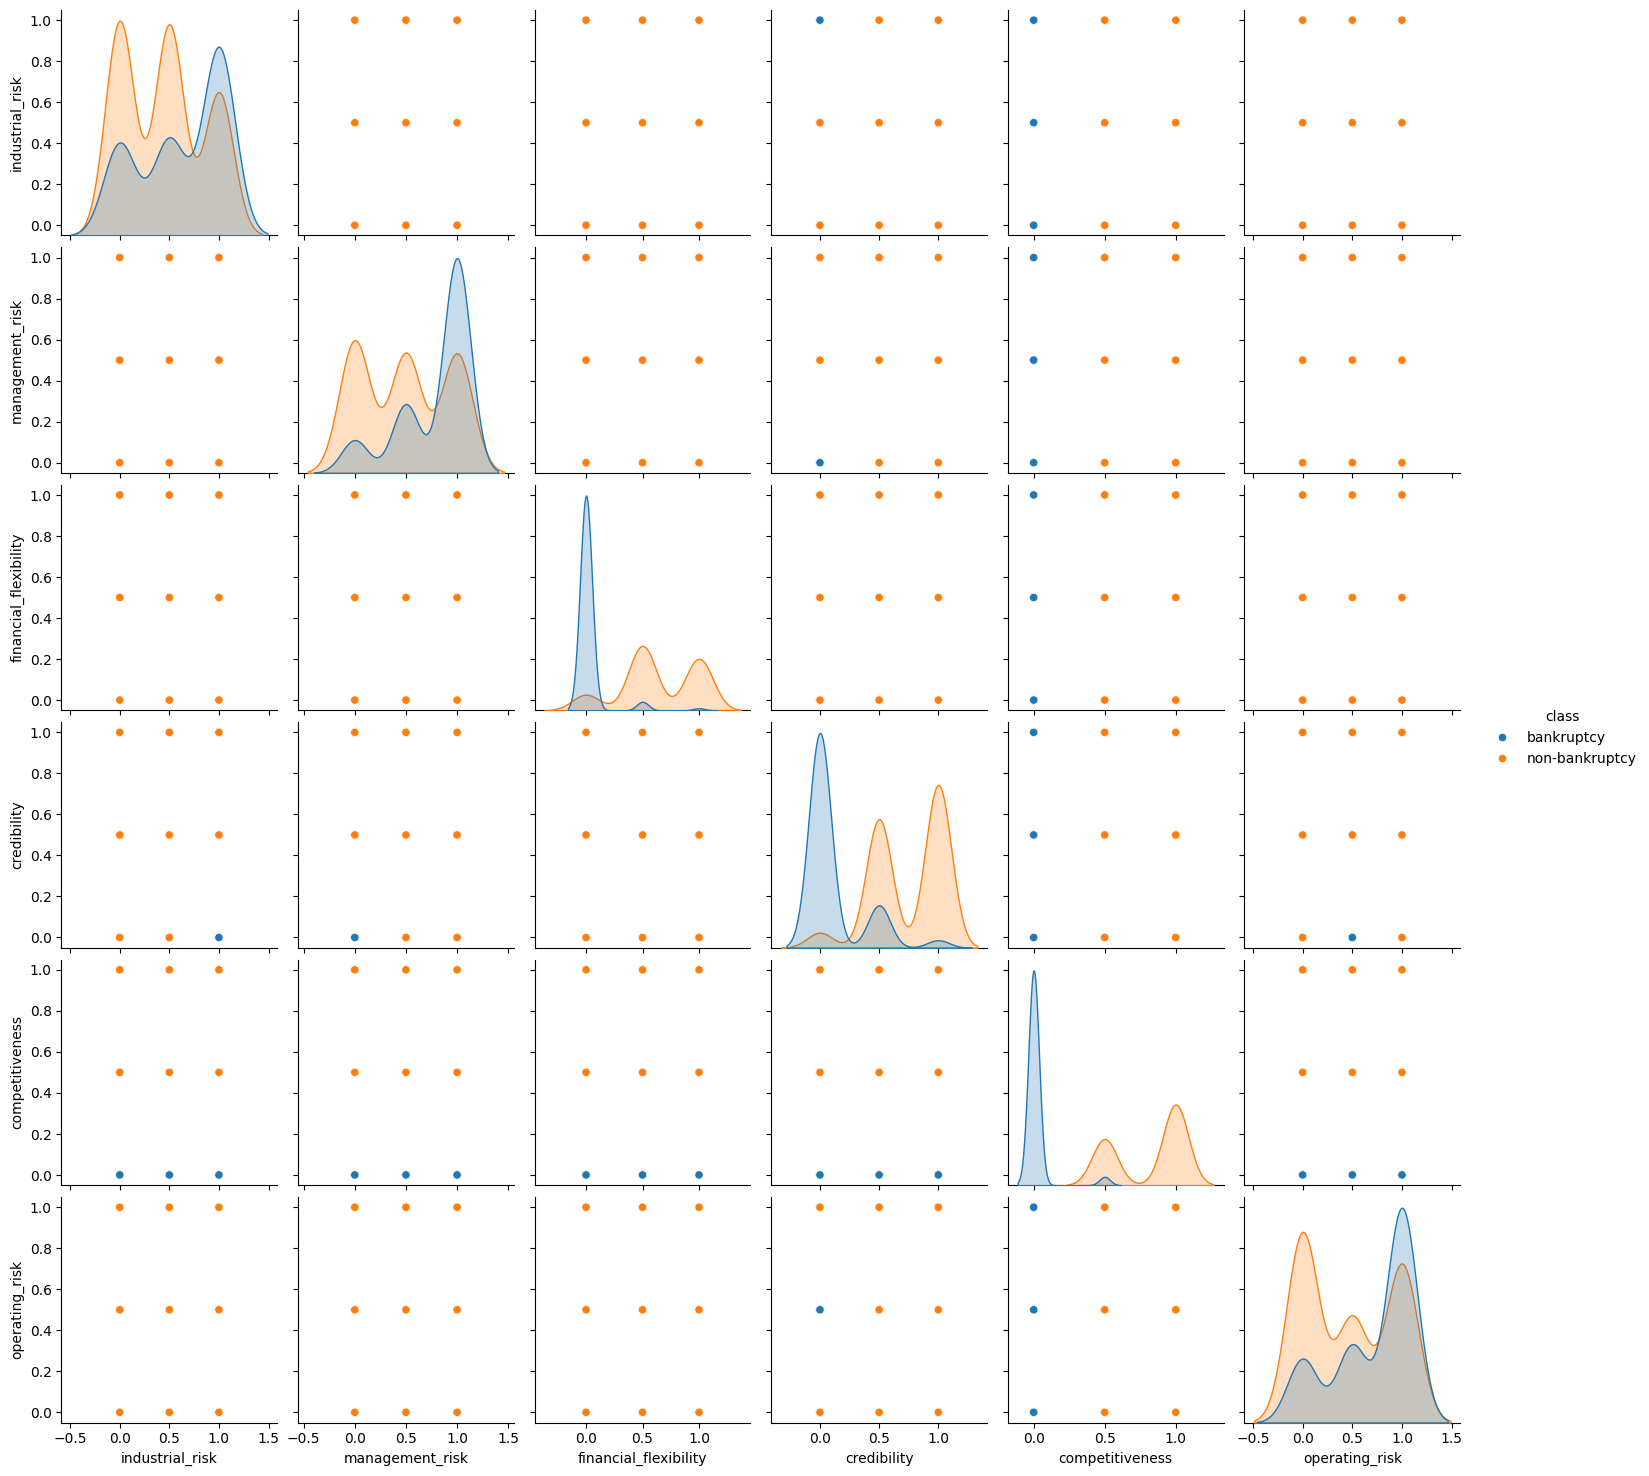

In [6]:
sns.pairplot(data=df, hue='class')

In [7]:
## separating the numerical values and non-numerical values
num_cols = [x for x in df.columns if df[x].dtypes != 'O']
cat_cols = [x for x in df.columns if df[x].dtypes == 'O']

In [15]:
print(f'Number of Numerical Columns => {len(num_cols)}')
print(f'Number of Categorical Columns => {len(cat_cols)}')

Number of Numerical Columns => 6
Number of Categorical Columns => 1


In [12]:
## correlation for the numerical values
corr = df[num_cols].corr()
corr

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255750,-0.163078,-0.014676,-0.258614,0.144486
management_risk,0.255750,1.000000,-0.252191,-0.300365,-0.303730,0.214879
financial_flexibility,-0.163078,-0.252191,1.000000,0.522955,0.685357,-0.117725
credibility,-0.014676,-0.300365,0.522955,1.000000,0.674088,-0.289956
competitiveness,-0.258614,-0.303730,0.685357,0.674088,1.000000,-0.212597
operating_risk,0.144486,0.214879,-0.117725,-0.289956,-0.212597,1.000000


<Axes: >

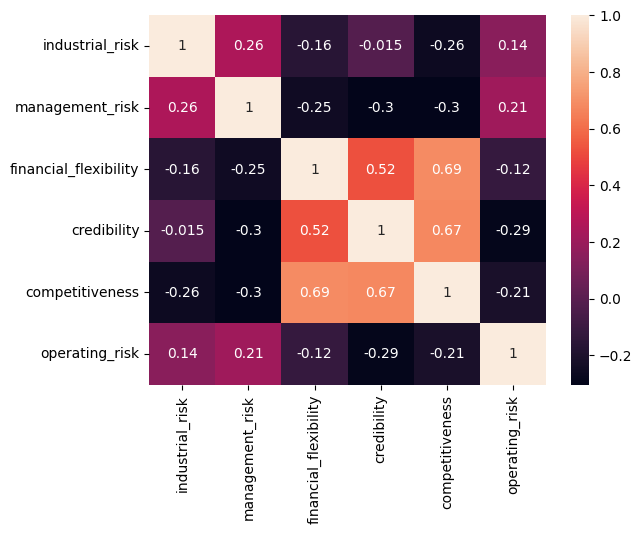

In [14]:
## heatmap for seeing the correlation effectively
sns.heatmap(data=corr, annot=True)

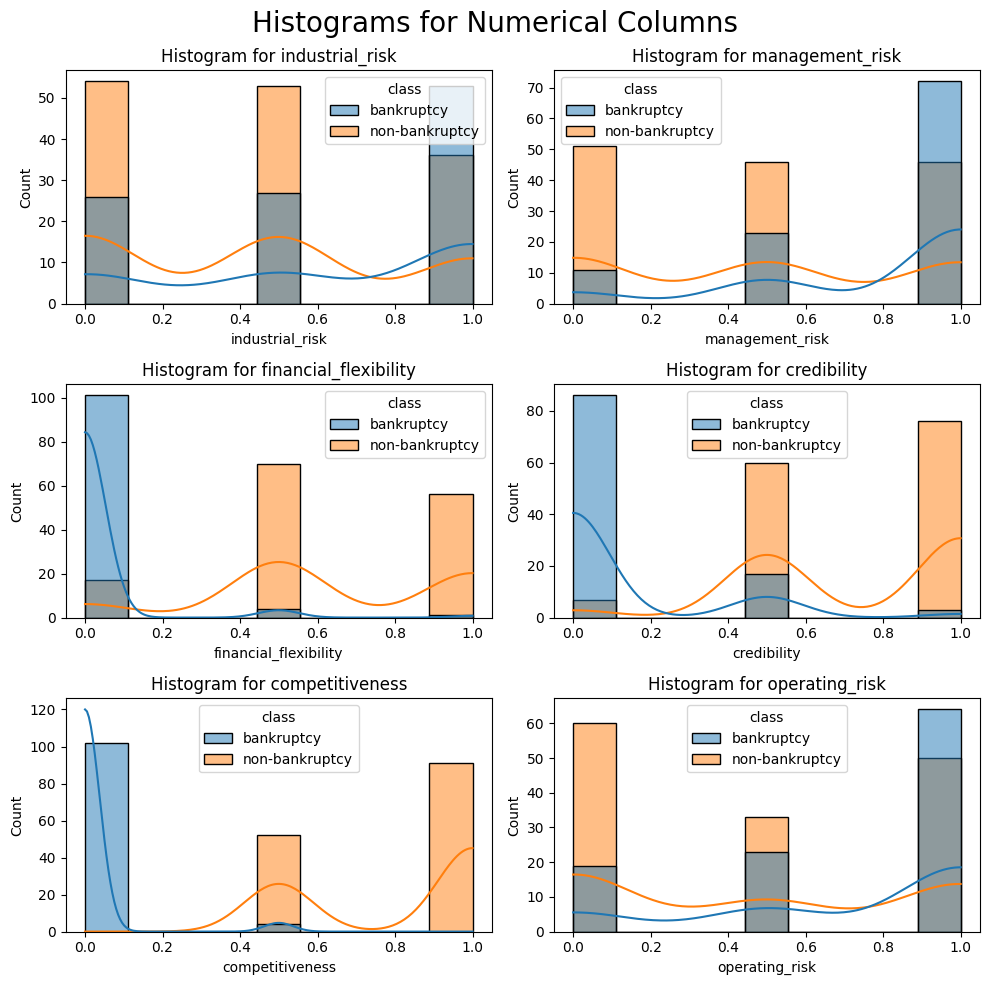

In [19]:
## histograms for numerical columns
plt.figure(figsize=(10,10))
plt.suptitle('Histograms for Numerical Columns', fontsize=20)
for idx, col in enumerate(num_cols, 1):
    plt.subplot(3,2,idx)
    plt.title(f'Histogram for {col}')
    sns.histplot(data=df, x=col, kde=True, hue='class')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

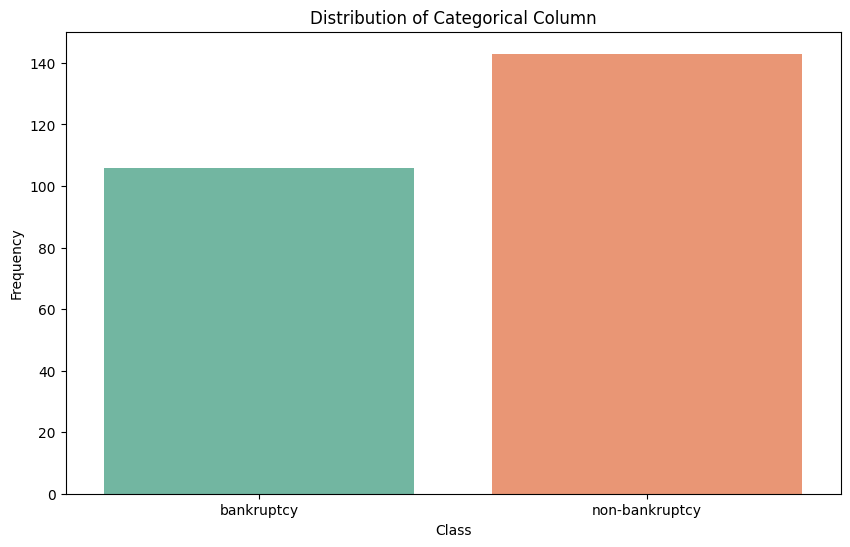

In [25]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Categorical Column')
sns.countplot(data=df, x='class', palette='Set2')
plt.xlabel('Class')
plt.ylabel('Frequency')